# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
# Problem stattemnet
#This research focus on targeting through telemarketing phone calls to sell long-term deposits. Within a campaign, the human agents execute phone calls to a list of clients to sell the deposit (outbound) or, if meanwhile the client calls the contact-center for any other reason, he is asked to subscribe the deposit (inbound). Thus, the result is a binary unsuccessful or successful contact.
#This study considers real data collected from a Portuguese retail bank, from May 2008 to June 2013, in a

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Business objective is to automatically predict the result of a phone call to sell long term deposits.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Total_rows = df.shape[0] ## 41188
percent = df.value_counts('y') / Total_rows * 100
percent.round(2)
# Clearly indicated the data is not Balanced

,count
y,
no,88.73
yes,11.27


In [8]:
#Two Columns that have significance
#duration: last contact duration, in seconds (numeric).
    #Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

<Axes: title={'center': 'Customers Not contacted at all'}, xlabel='Days', ylabel='count'>

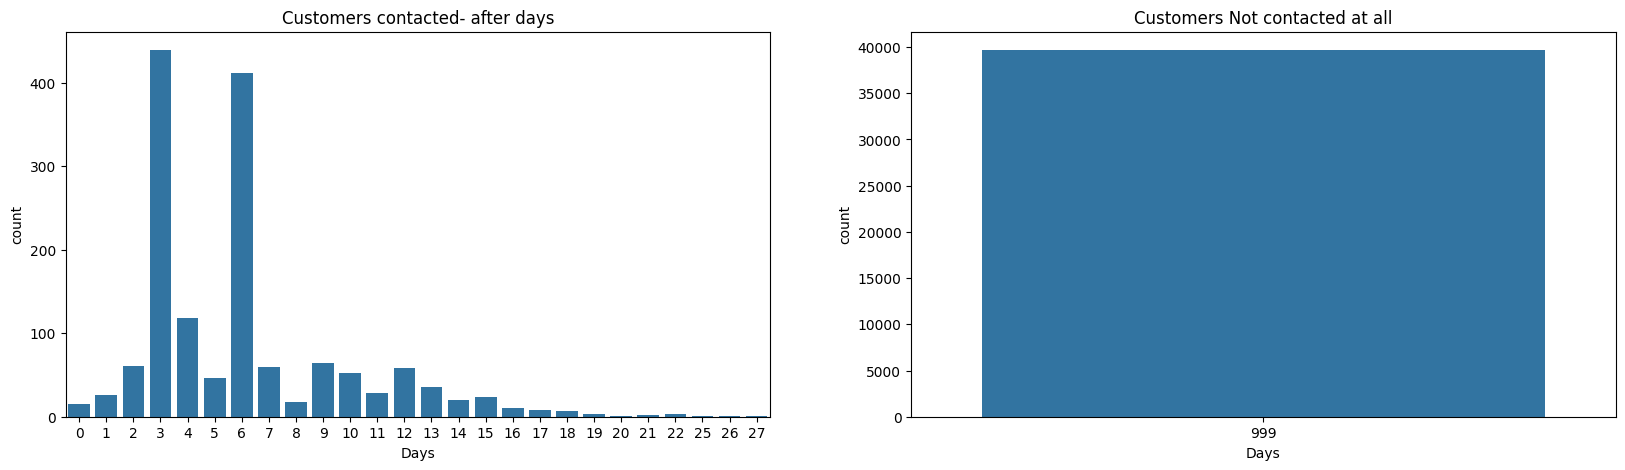

In [9]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Customers contacted- after days')
filt_data = df[df['pdays'] != 999]
plt.xlabel('Days')
sns.countplot(x='pdays',data= filt_data)

plt.subplot(1,2,2)
plt.title('Customers Not contacted at all')
filt_data_nocontact = df[df['pdays'] == 999]
plt.xlabel('Days')
sns.countplot(x='pdays',data= filt_data_nocontact)



In [10]:
Total_rows = filt_data.shape[0]
print(Total_rows) ## 1515
percent = filt_data.value_counts('y') / Total_rows * 100
percent.round(2)

1515


,count
y,
yes,63.83
no,36.17


In [11]:
Total_rows = filt_data_nocontact.shape[0]
print(Total_rows) ## 39,673
percent = filt_data_nocontact.value_counts('y') / Total_rows * 100
percent.round(2)

39673


,count
y,
no,90.74
yes,9.26


In [12]:
# Another annalyis for Duration to check the Unbalanced data
df['duration'].value_counts()
df['duration'].describe()

,duration
count,41188.000000
mean,258.285010
std,259.279249
min,0.000000
25%,102.000000
50%,180.000000
75%,319.000000
max,4918.000000


In [13]:
#As the data is unbalanced going to use the data whare call has been made only
#df_foranalysis = df.query('duration == 0')

#df_foranalysis.count()
#test = df_foranalysis['duration'].groupby(df_foranalysis['y']).count()
#test.head()

In [14]:
# the thought is to use this adta fro or anlayis and prediction
filt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1515 entries, 24108 to 41182
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1515 non-null   int64  
 1   job             1515 non-null   object 
 2   marital         1515 non-null   object 
 3   education       1515 non-null   object 
 4   default         1515 non-null   object 
 5   housing         1515 non-null   object 
 6   loan            1515 non-null   object 
 7   contact         1515 non-null   object 
 8   month           1515 non-null   object 
 9   day_of_week     1515 non-null   object 
 10  duration        1515 non-null   int64  
 11  campaign        1515 non-null   int64  
 12  pdays           1515 non-null   int64  
 13  previous        1515 non-null   int64  
 14  poutcome        1515 non-null   object 
 15  emp.var.rate    1515 non-null   float64
 16  cons.price.idx  1515 non-null   float64
 17  cons.conf.idx   1515 non-null   f

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time

In [18]:
X = filt_data.drop(columns='y')
y = filt_data['y']

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [19]:
y

array([0, 0, 0, ..., 1, 1, 0])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Problem 6.1 :- Encoding section

In [21]:
#do the encoding here
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )


In [22]:
# Fit on training, transform both sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score

In [24]:
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train_transformed, y_train)
y_base = baseline.predict(X_test_transformed)

In [25]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
print("Baseline accuracy:", accuracy_score(y_test, y_base))
print("Baseline precision_score:", precision_score(y_test, y_base))
print("Baseline recall_score:", recall_score(y_test, y_base))
print("Baseline f1_score:", f1_score(y_test, y_base))


Confusion Matrix:
 [[  0 106]
 [  0 197]]
Baseline accuracy: 0.6501650165016502
Baseline precision_score: 0.6501650165016502
Baseline recall_score: 1.0
Baseline f1_score: 0.788


Encoding section

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [26]:
model = LogisticRegression()
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

### Problem 9: Score the Model

What is the accuracy of your model?

In [27]:
print("Confusion Matrix of : LogisticRegression \n", confusion_matrix(y_test, y_pred))
print("Model accuracy LogisticRegression :", accuracy_score(y_test, y_pred))
print("Model precision_score LogisticRegression :", precision_score(y_test, y_pred))
print("Model recall_score LogisticRegression :", recall_score(y_test, y_pred))
print("Model f1_score LogisticRegression :", f1_score(y_test, y_pred))

Confusion Matrix of : LogisticRegression 
 [[ 45  61]
 [ 30 167]]
Model accuracy LogisticRegression : 0.6996699669966997
Model precision_score LogisticRegression : 0.7324561403508771
Model recall_score LogisticRegression : 0.8477157360406091
Model f1_score LogisticRegression : 0.7858823529411765


In [28]:
pip install -U skore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.9/149.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.8/470.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.9 MB/s eta 0:00:00


In [75]:
from skore import EstimatorReport

In [76]:
rf_report = EstimatorReport(
    model, X_train=X_train_transformed, X_test=X_test_transformed, y_train=y_train, y_test=y_test, pos_label=1
)

In [77]:
rf_report.metrics.summarize(indicator_favorability=True).frame()

,LogisticRegression,Favorability
Metric,,
Precision,0.732456,(↗︎)
Recall,0.847716,(↗︎)
ROC AUC,0.717412,(↗︎)
Brier score,0.194502,(↘︎)
Fit time (s),NaN,(↘︎)
Predict time (s),0.000539,(↘︎)


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )

In [30]:
# Fit on training, transform both sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [31]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'SVM': SVC()
}

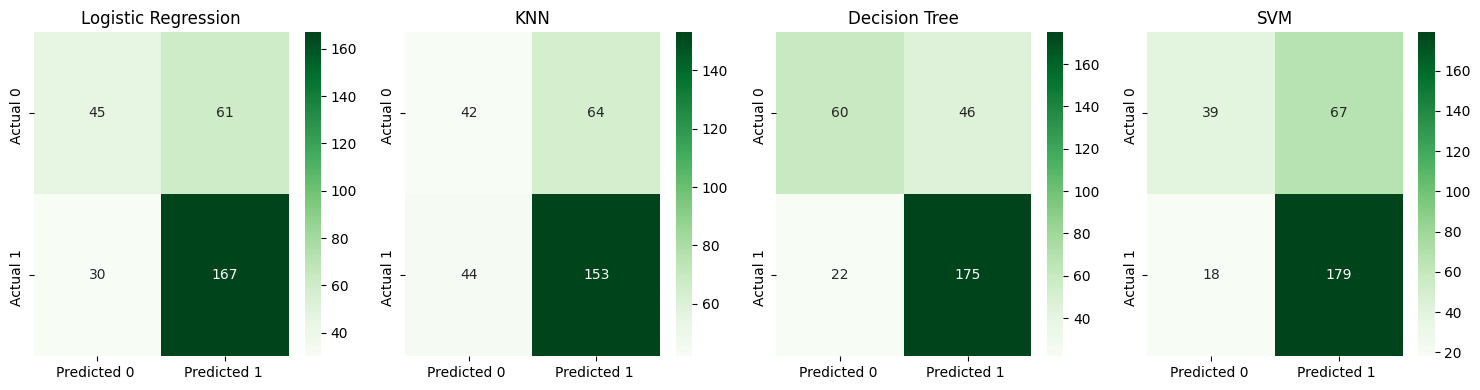


Model Performance Comparison:


,name,accuracy,precision,recall,f1,end_time
0,Logistic Regression,0.70,0.73,0.85,0.79,0.49
1,KNN,0.64,0.71,0.78,0.74,0.02
2,Decision Tree,0.78,0.79,0.89,0.84,0.01
3,SVM,0.72,0.73,0.91,0.81,0.17


In [45]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 4))
if len(models) == 1:
    axes = [axes]

results_lessdf= []

#metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1-score" , "End-Time"])

for ax, (name, model) in zip (axes, models.items()):
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    end_time = time.time() - start_time

    #metrices
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_lessdf.append([name, accuracy, precision, recall, f1, end_time])

    # Plot heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',ax=ax,
            xticklabels=['Predicted 0 ', 'Predicted 1 '],
            yticklabels=['Actual 0 ', 'Actual 1 '])
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Display metrics table
print("\nModel Performance Comparison:")
results_fd = pd.DataFrame(results_lessdf, columns=['name','accuracy', 'precision', 'recall', 'f1', 'end_time' ]).round(2)
results_fd

    #print("Model accuracy of " + name + ":" , accuracy_score(y_test, y_pred))
    #print("Model precision_score of " + name + ":" , precision_score(y_test, y_pred))
    #print("Model recall_score of " + name + ":" , recall_score(y_test, y_pred))
    #print("Model f1_score of " + name + ":" , f1_score(y_test, y_pred))

In [28]:
# In this case Decision tree is giving the best F1 score, Preciosn & Recall also looks good
#SVM has the good recall but from the time execution it is much longer then Decison Tree

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [50]:
#data to load for analayis
# planning to chnage the dataset and to see how it behaves
#Chage the above dataset to sawp and perform analysis
#filt_data = df[df['pdays'] != 999]
filt_data = df

X = filt_data.drop(columns='y')
y = filt_data['y']

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )


models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'SVM': SVC()
}

param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear']
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7,9],
        'model__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'model__max_depth': [3, 5, 10, None],
        'model__min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    }
}



In [53]:
import warnings
warnings.filterwarnings("ignore")

Best Score (cross-validated f1 macro): 0.5132274161307782
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Best Score (cross-validated f1 macro): 0.4934047650782073
Best Parameters: {'model__n_neighbors': 9, 'model__weights': 'distance'}
Best Score (cross-validated f1 macro): 0.5867104296355382
Best Parameters: {'model__max_depth': 3, 'model__min_samples_split': 2}
Best Score (cross-validated f1 macro): 0.5226668888138726
Best Parameters: {'model__C': 10, 'model__kernel': 'rbf'}

Model Performance Comparison:


,name,accuracy,precision,recall,f1,end_time
0,Logistic Regression,0.91,0.67,0.44,0.53,11.79
1,KNN,0.90,0.61,0.43,0.51,57.68
2,Decision Tree,0.91,0.60,0.59,0.60,18.61
3,SVM,0.91,0.64,0.48,0.55,1048.38


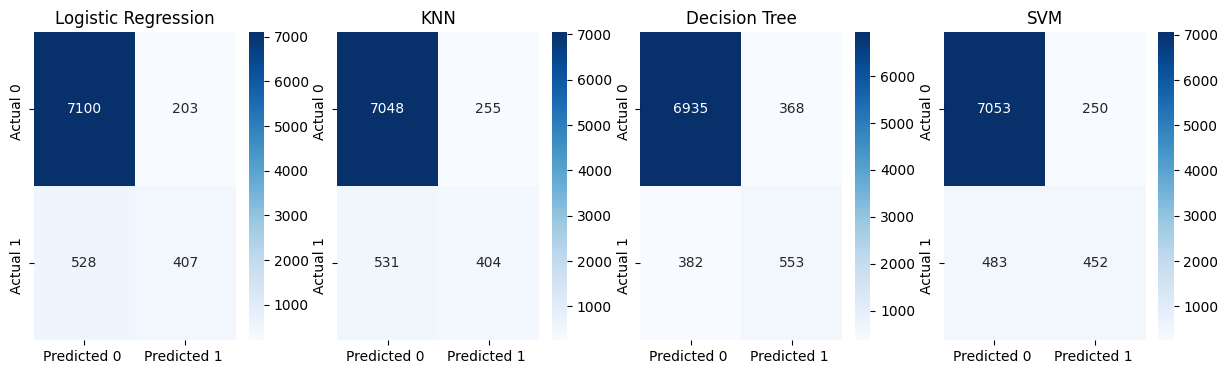

In [55]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 4))
if len(models) == 1:
    axes = [axes]

best_estimators = []
results = []

for ax, (name, model) in zip (axes, models.items()):

    # Create pipeline: preprocessing + model
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Grid search
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=5,
        scoring='f1',
        n_jobs=-1
    )

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time() - start_time

    # Print best results
    print("Best Score (cross-validated f1 macro):", grid_search.best_score_)
    #print("Best Estimator (Estimator):", grid_search.best_estimator_)
    print("Best Parameters:", grid_search.best_params_)


    y_pred = grid_search.predict(X_test)

    # Store best estimator
    best_estimators.append((name, grid_search.best_estimator_))

    #metrices
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1, end_time])

    # Plot heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',ax=ax,
            xticklabels=['Predicted 0 ', 'Predicted 1 '],
            yticklabels=['Actual 0 ', 'Actual 1 '])
    ax.set_title(name)

# Display metrics table
print("\nModel Performance Comparison:")
results_df = pd.DataFrame(results, columns=['name', 'accuracy', 'precision', 'recall', 'f1', 'end_time' ]).round(2)
results_df


#print(best_estimators)

In [56]:
results_df = pd.DataFrame(results, columns=['model-Tuning', 'accuracy', 'precision', 'recall', 'f1', 'end_time' ]).round(2)
results_df

,model-Tuning,accuracy,precision,recall,f1,end_time
0,Logistic Regression,0.91,0.67,0.44,0.53,11.79
1,KNN,0.90,0.61,0.43,0.51,57.68
2,Decision Tree,0.91,0.60,0.59,0.60,18.61
3,SVM,0.91,0.64,0.48,0.55,1048.38


In [57]:
results_fd = pd.DataFrame(results_lessdf, columns=['model','accuracy', 'precision', 'recall', 'f1', 'end_time' ]).round(2)
results_fd

,model,accuracy,precision,recall,f1,end_time
0,Logistic Regression,0.70,0.73,0.85,0.79,0.49
1,KNN,0.64,0.71,0.78,0.74,0.02
2,Decision Tree,0.78,0.79,0.89,0.84,0.01
3,SVM,0.72,0.73,0.91,0.81,0.17


##### Questions